<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalhos-UERJ-analise-de-dados/blob/main/notebooks%20fisica/canh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
distB = [1.595,1.63,1.635,1.565,1.53,1.152]
angulos = ['30°','40°','50°','60°','70°','80°']
dataC = [
    [8.5,7.2,7.5,7.3,0.1],
    [7  ,7.2,7.4,0.2,4.7],
    [3.5,3.2,5.3,5.5,3],
    [3.5,3.7,4.7,10,4.6],
    [2.6,5.5,4.7,4.2,6.1],
    [13.2,13.3,15.2,15.7,6.2]
]

data= []

for i, e in enumerate(distB):
  data.append(list(map(lambda x: x/100 + e,dataC[i])))

In [7]:
data = tuple(map(tuple, data))
data

((1.68, 1.667, 1.67, 1.668, 1.5959999999999999),
 (1.7, 1.702, 1.704, 1.632, 1.6769999999999998),
 (1.67, 1.667, 1.688, 1.69, 1.665),
 (1.5999999999999999, 1.6019999999999999, 1.6119999999999999, 1.665, 1.611),
 (1.556, 1.585, 1.577, 1.572, 1.591),
 (1.2839999999999998, 1.285, 1.3039999999999998, 1.309, 1.214))

In [8]:
df = pd.DataFrame(np.c_[data], columns=angulos)
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>30°</th>\n      <th>40°</th>\n      <th>50°</th>\n      <th>60°</th>\n      <th>70°</th>\n      <th>80°</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1.680</td>\n      <td>1.700</td>\n      <td>1.670</td>\n      <td>1.600</td>\n      <td>1.556</td>\n      <td>1.284</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1.667</td>\n      <td>1.702</td>\n      <td>1.667</td>\n      <td>1.602</td>\n      <td>1.585</td>\n      <td>1.285</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1.670</td>\n      <td>1.704</td>\n      <td>1.688</td>\n      <td>1.612</td>\n      <td>1.577</td>\n      <td>1.304</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>1.668</td>\n      <td>1.632</td>\n      <td>1.690</td>\n      <td>1.665</td>\n      <td>1.572</td>\n      <td>1.309</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>1.596</td>\n      <t

In [9]:
def getVariancia(arraio): 
  media = arraio.mean()
  diferencas = list(map(lambda val: (val-media)**2,arraio.values))
  varianca = np.sum(diferencas)/len(arraio)
  return varianca

In [10]:
def getDesvioPadrao(arraio):
  variancia = getVariancia(arraio)
  return variancia**(1/2)

#print(np.std(df['no cronometro']))


In [11]:
def getErroInstrumental(arraio):
  desv = getDesvioPadrao(arraio)
  return desv / (len(arraio)**(1/2))

In [12]:
for key in df.keys():
  maximo , minimo , media = round(df[key].max(),3) , round(df[key].min(),3) ,  round(df[key].mean(),3)
  abr = round(maximo - minimo,3)
  desvioPd = round(getDesvioPadrao(df[key]),4)
  erroInstrumental = round(getErroInstrumental(df[key]),3)
  print(key)
  print(f'maximo {key} : {maximo}')
  print(f'minimo {key} : {minimo}')
  print(f'media {key} : {media}')
  print(f'abrangencia {key} : {abr}')
  print(f'desvio padrão: {desvioPd}')
  print(f'erro instrumental: {erroInstrumental}')
  print(f'estimativa: {media} ± {erroInstrumental}\n')

30°
maximo 30° : 1.68
minimo 30° : 1.596
media 30° : 1.656
abrangencia 30° : 0.084
desvio padrão: 0.0305
erro instrumental: 0.014
estimativa: 1.656 ± 0.014

40°
maximo 40° : 1.704
minimo 40° : 1.632
media 40° : 1.683
abrangencia 40° : 0.072
desvio padrão: 0.0273
erro instrumental: 0.012
estimativa: 1.683 ± 0.012

50°
maximo 50° : 1.69
minimo 50° : 1.665
media 50° : 1.676
abrangencia 50° : 0.025
desvio padrão: 0.0108
erro instrumental: 0.005
estimativa: 1.676 ± 0.005

60°
maximo 60° : 1.665
minimo 60° : 1.6
media 60° : 1.618
abrangencia 60° : 0.065
desvio padrão: 0.024
erro instrumental: 0.011
estimativa: 1.618 ± 0.011

70°
maximo 70° : 1.591
minimo 70° : 1.556
media 70° : 1.576
abrangencia 70° : 0.035
desvio padrão: 0.012
erro instrumental: 0.005
estimativa: 1.576 ± 0.005

80°
maximo 80° : 1.309
minimo 80° : 1.214
media 80° : 1.279
abrangencia 80° : 0.095
desvio padrão: 0.0341
erro instrumental: 0.015
estimativa: 1.279 ± 0.015



In [13]:
obj = {}
obj['ângulo'] = []
obj['máximo'] = []
obj['mínimo'] = []
obj['media'] = []
obj['abrangência'] = []
obj['desvio padrão'] = []
obj['erro instrumental'] = []
obj['estimativa'] = []

for key in df.keys():
  maximo , minimo , media = round(df[key].max(),3) , round(df[key].min(),3) ,  round(df[key].mean(),3)
  abr = round(maximo - minimo,3)
  desvioPd = round(getDesvioPadrao(df[key]),4)
  erroInstrumental = round(getErroInstrumental(df[key]),3)
  estimativa = f'{media} ± {erroInstrumental}'
  obj['ângulo'].append(key)
  obj['máximo'].append(maximo)
  obj['mínimo'].append(minimo)
  obj['media'].append(media)
  obj['abrangência'].append(abr)
  obj['desvio padrão'].append(desvioPd)
  obj['erro instrumental'].append(erroInstrumental)
  obj['estimativa'].append(estimativa)

objDf = pd.DataFrame(obj)
objDf.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>ângulo</th>\n      <th>máximo</th>\n      <th>mínimo</th>\n      <th>media</th>\n      <th>abrangência</th>\n      <th>desvio padrão</th>\n      <th>erro instrumental</th>\n      <th>estimativa</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>30°</td>\n      <td>1.680</td>\n      <td>1.596</td>\n      <td>1.656</td>\n      <td>0.084</td>\n      <td>0.0305</td>\n      <td>0.014</td>\n      <td>1.656 ± 0.014</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>40°</td>\n      <td>1.704</td>\n      <td>1.632</td>\n      <td>1.683</td>\n      <td>0.072</td>\n      <td>0.0273</td>\n      <td>0.012</td>\n      <td>1.683 ± 0.012</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>50°</td>\n      <td>1.690</td>\n      <td>1.665</td>\n      <td>1.676</td>\n      <td>0.025</td>\n      <td>0.0108</td>\n      <td>0.005</td>\n      <td>1.676 ± 0.005</td

In [14]:
df.values[0]

array([1.68 , 1.7  , 1.67 , 1.6  , 1.556, 1.284])

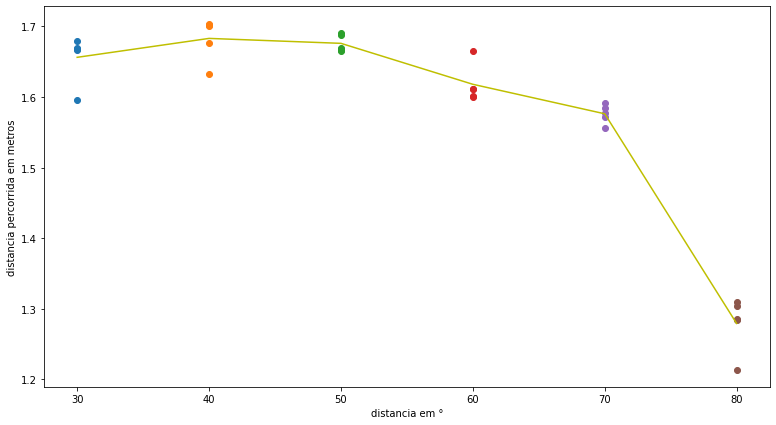

In [47]:
fig, ax = plt.subplots()
x= lambda n : list(map(lambda x: 10*n + 30,range(len(data[0]))))
for i in range(len(data)):
  ax.scatter(x=x(i) ,y= data[i])

base = np.array(list(map(lambda x: 30 + (10*x),range(len(data)))))
counts = np.array(list(map(lambda x : np.mean(x),data)))
ax.plot(base,counts,color='y')
fig.set_size_inches(13,7)
ax.set_ylabel('distancia percorrida em metros')
ax.set_xlabel('distancia em °')
fig.patch.set_facecolor('xkcd:white')
fig.show()

In [50]:

from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(base, counts)
X_ = np.linspace(base.min(), base.max(), 500)
Y_ = X_Y_Spline(X_)

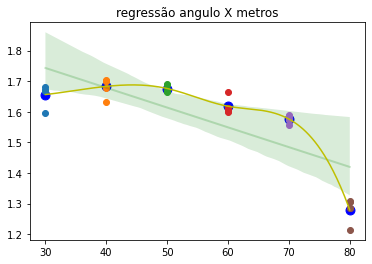

In [53]:
import seaborn as sns

sns.regplot(
    x=base,
    y=counts,
    ci=78,

    # Cor dos pontos
    scatter_kws={
        'color' : 'blue',
        's' : 80,
        'alpha' : 1
    },

    # Cor da Linha
    line_kws={
        'color' : 'green',
        'alpha' : 0.2,
        'lw' : 2
    },

)

x= lambda n : list(map(lambda x: 10*n + 30,range(len(data[0]))))
for i in range(len(data)):
  plt.scatter(x=x(i) ,y= data[i])

plt.plot(X_,Y_,color='y')
fig.set_size_inches(13,7)
plt.title('regressão angulo X metros')
fig.patch.set_facecolor('xkcd:white')